Loading package / other files

In [902]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans,DBSCAN
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
import outliers


## Classification

Importing the dataset : 

In [903]:
df1= pd.read_csv("normalized_clean_dataframe_wo_outlier.csv", sep=",")
country_names=df1["Country Name"]
df=df1.drop(columns=["Country Name"],axis=1)
df

,International migrant stock (% of population),"Life expectancy at birth, total (years)",GDP (constant 2015 US$),Urban population (% of total population),Access to electricity (% of population),Individuals using the Internet (% of population)
0,-0.585148,-1.146456,-0.227132,-1.423955,-0.397757,-1.366918
1,-0.530357,0.841848,-0.232471,-0.028078,0.637887,0.325320
2,-0.623168,0.465955,-0.136640,0.545742,0.609038,-0.325273
3,-0.635565,-1.395724,-0.185463,0.229102,-1.470491,-0.888889
4,-0.237580,0.318433,-0.232987,0.213659,0.638614,0.401889
...,...,...,...,...,...,...
144,-0.659079,0.248778,-0.091215,-1.038700,0.632116,-0.088694
145,-0.295697,0.314702,-0.230868,0.739097,0.634977,0.318361
146,-0.577942,-0.746680,-0.213218,-0.997291,-0.550088,-0.816335
147,-0.611182,-1.326939,-0.226356,-0.692286,-1.866857,-1.348131


We choose the attribute Current health expenditure per capita (current US$) to create 3 groups of countries : riche, pauvre, normal

In [904]:

def classification(name):
    Health=[]
    compteur=[0,0,0]
    mean=np.mean(df[name]) #to know the average of the column Current health expenditure per capita (current US$)
    std=np.std(df[name]) #to know the standard deviation of the column Current health expenditure per capita (current US$)
    for i in df[name]:
        if i>mean+0.5*std:
            compteur[2]+=1
            Health.append("riche")
        elif i<mean-0.5*std:
            compteur[0]+=1
            Health.append("pauvre")
        else:
            compteur[1]+=1
            Health.append("normal")


    y=df[name]
    for i in range(0,len(y)):
        if y[i]>mean+0.5*std:
            y[i]="riche"
        elif y[i]<mean-0.5*std:
            y[i]="pauvre"
        else:
            y[i]="normal"
    X=df.drop(columns=[name],axis=1)
    return df,X,Health,y,compteur

df,X,Health,y,compteur=classification("Life expectancy at birth, total (years)")
print(compteur)
df["Life expectancy at birth, total (years)"]

[50, 43, 56]


0      pauvre
1       riche
2       riche
3      pauvre
4       riche
        ...  
144     riche
145     riche
146    pauvre
147    pauvre
148    pauvre
Name: Life expectancy at birth, total (years), Length: 149, dtype: object

In [905]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def score(name):
    """permet de ca

    Args:
        name : name of the class to be studied

    Returns:
        F1 : Calculation of the F1 score of the model
        y_predict : Using the decision tree to predict the class membership of the test set instances
        accuracy : Calculation of the accuracy of the model
    """
    F1=[]
    precision_score=[]
    dfHealth=df[name]
    x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Health, test_size=0.20, train_size=0.80,shuffle=True,stratify=Health)
    dt = DecisionTreeClassifier(random_state=5)
    dt.fit(x_train,y_train) #Fit the decision tree using the training set  
    y_predict = dt.predict(x_test) 
    F1.append(f1_score(y_test,y_predict,average="weighted")) 
    F1.append(f1_score(y_test,y_predict,average="macro"))
    accuracy=accuracy_score(y_test,y_predict)
    classificationreport=classification_report(y_test, y_predict)  
    return F1,accuracy,classificationreport,dt

F1,accuracy,classificationreport,dt=score("Life expectancy at birth, total (years)")
print(classificationreport)



              precision    recall  f1-score   support

      normal       0.56      0.56      0.56         9
      pauvre       0.89      0.80      0.84        10
       riche       0.75      0.82      0.78        11

    accuracy                           0.73        30
   macro avg       0.73      0.72      0.73        30
weighted avg       0.74      0.73      0.73        30



Arbre de decision

In [906]:
legende=['Net migration', 'Life expectancy at birth, total (years)',
       'GDP per capita (current US$)',
       'Urban population (% of total population)',
       'Access to electricity (% of population)']
colonne=['Net migration', 'Life expectancy',
       'GDP',
       'Urban population',
       'Access to electricity']

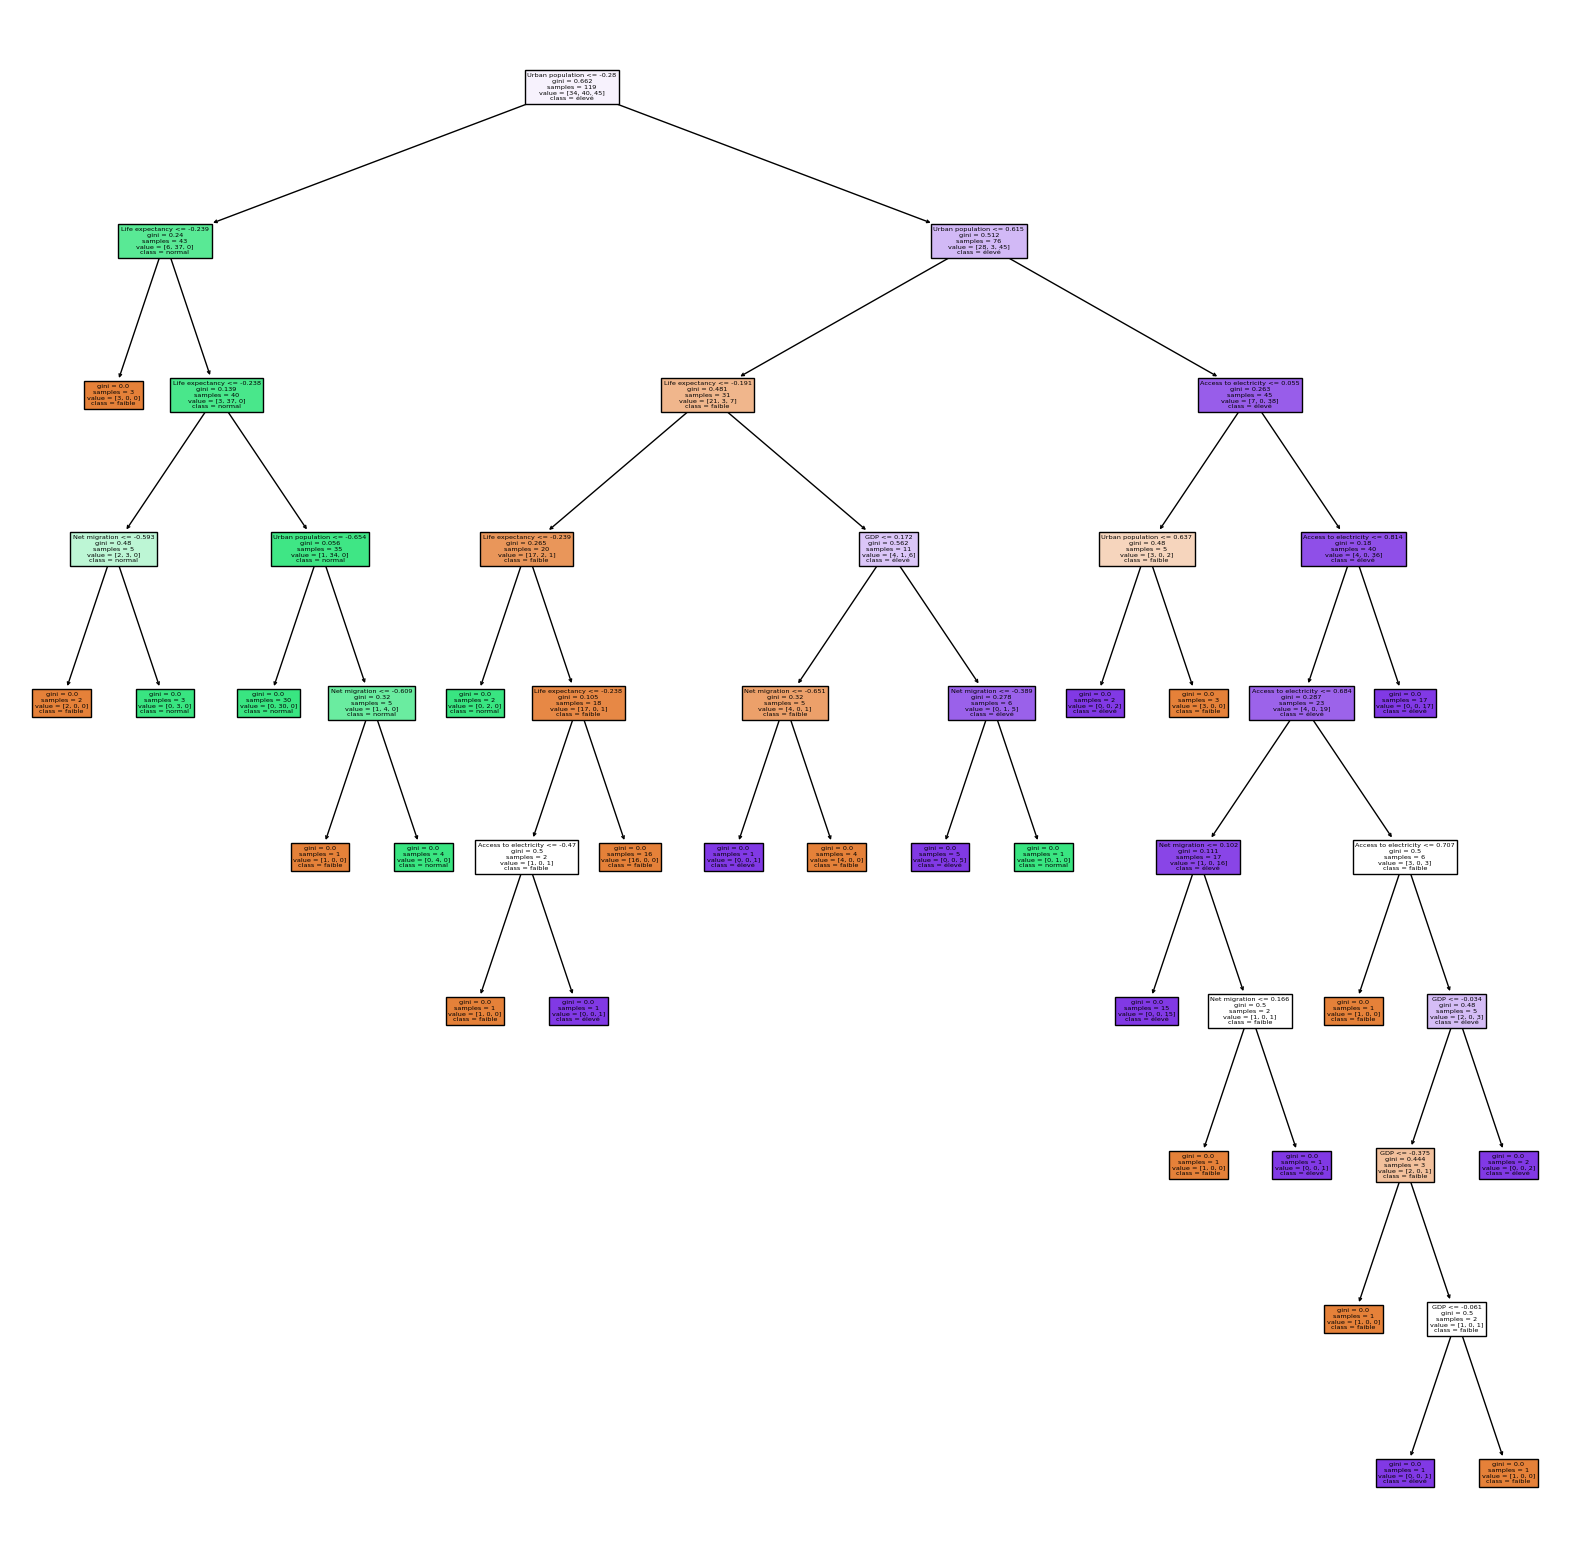

In [907]:

try:
    from sklearn.tree import plot_tree
    plt.figure(figsize=(20,20))
    #sklearn.tree.plot_tree(dt,feature_names=df.columns,class_names=["faible","normal","élevé"],filled=True,fontsize=10)
    _=plot_tree(dt,filled=True,feature_names=colonne,class_names=["faible","normal","élevé"])
except ImportError:
    pass

Sklearn's decision tree algorithm allows us to deduce the relationships between different features in a data set and the target variable by building a tree model. The decision tree is used here for classification tasks. The decision process of the model can be visualised, which makes it easier to understand and interpret the results.

+ Entraînement du modèle $K$-NN avec des paramètres par défaut, en utilisant l'ensemble de données brutes et un autre en utilisant l'ensemble de données normalisées

In [908]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate 

cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

knn = KNeighborsClassifier()
scores = cross_validate(knn, X, y, scoring=scoring,cv=cv, return_train_score=True)
scores = pd.DataFrame(scores).mean()
scores


fit_time                    0.002673
score_time                  0.009725
test_accuracy               0.778231
train_accuracy              0.805152
test_precision_weighted     0.787414
train_precision_weighted    0.804059
test_recall_weighted        0.778231
train_recall_weighted       0.805152
test_f1_weighted            0.773073
train_f1_weighted           0.802263
dtype: float64

In [909]:
from sklearn.neighbors import KNeighborsClassifier

# Initialiser le modèle KNN avec n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)

# entrainer le modèle avec les données
knn.fit(X,y)

# Prédire les classes pour chaque point de données
clusters_knn = knn.predict(X)


cluster1_d=[]
cluster2_d=[]
cluster3_d=[]
clusterErr_d=[]
i=0
for lin in country_names:
    if clusters_knn[i]=="pauvre":
        cluster1_d.append(lin)
    elif clusters_knn[i]=="normal":
        cluster2_d.append(lin)
    elif clusters_knn[i]=="riche":
        cluster3_d.append(lin)
    else:
        clusterErr_d.append(lin)
    i+=1

print("======================================================")
print("Pays pauvre : ")   
print("======================================================")
print(cluster1_d)
print("======================================================")
print("Pays moyen : ")   
print("======================================================")
print(cluster2_d)
print("======================================================")
print("Pays riches : ")   
print("======================================================")
print(cluster3_d)
print("======================================================")
print("Pays non classés : ")
print("======================================================")
print(clusterErr_d)

Pays pauvre : 
['Angola', 'Bangladesh', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Equatorial Guinea', 'Ethiopia', 'Gambia, The', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Pakistan', 'Papua New Guinea', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']
Pays moyen : 
['Afghanistan', 'Cabo Verde', 'Egypt, Arab Rep.', 'El Salvador', 'Eswatini', 'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Guatemala', 'Guyana', 'Honduras', 'Iraq', 'Jamaica', 'Kiribati', 'Kyrgyz Republic', 'Lao PDR', 'Micronesia, Fed. Sts.', 'Mongolia', 'Myanmar', 'Nepal', 'Nicaragua', 'Paraguay', 'Philippines', 'Samoa', 'Solomon Islands', 'Sri Lanka', 'St. Lucia', 'Syri

<AxesSubplot: >

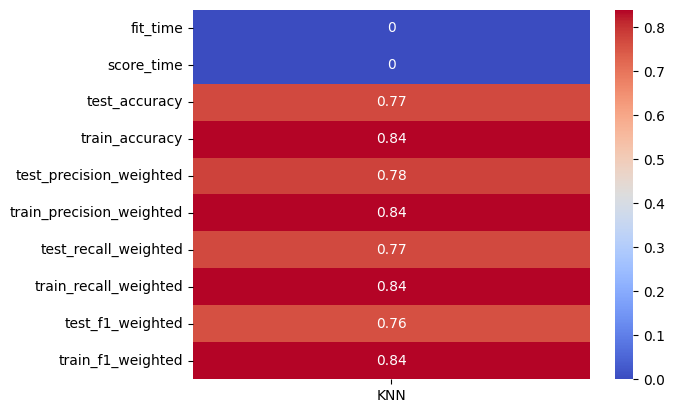

In [910]:
import seaborn as sns
full_scores = pd.DataFrame({"KNN":scores_knn})
sns.heatmap(full_scores.T.round(2).T,annot=True,cmap='coolwarm')

# Cross-validation

In [911]:
from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics

+ Create a __stratified cross-validation__ splitter 

In [912]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

+ Define a __list of evaluation metrics__ to assess

In [913]:
#Evalue la performance d'un modèle de décision (dt) sur des données d'entraînement (X) et de test (y).
#La fonction cross_validate effectue une validation croisée en divisant les données en "plusieurs plis" et en entraînant et en testant le modèle sur chacun d'eux. 
scores=[]

scores = cross_validate(dt, X, y, scoring=scoring,
                        cv=cv, return_train_score=True)
a=sklearn.model_selection.cross_validate(dt, X, y)
print(a["score_time"][3])
print(a)


0.003999233245849609
{'fit_time': array([0.        , 0.00401711, 0.00399876, 0.        , 0.00491619]), 'score_time': array([0.00400233, 0.        , 0.        , 0.00399923, 0.00107169]), 'test_score': array([0.73333333, 0.8       , 0.76666667, 0.8       , 0.55172414])}


+ the fit_time: is an array of the time needed to train the model on each "fold" of the cross-validation
+ score_time: is a table containing the time needed to evaluate the model on each "fold" of the cross-validation
+ the test_score: is a table containing the accuracy scores on the test data for each "fold" of the cross-validation

0.7185060803542195


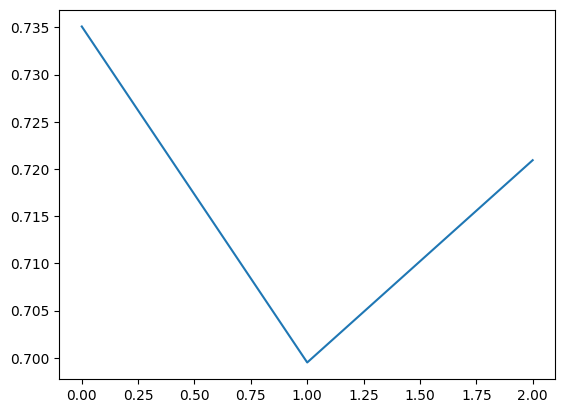

In [914]:
scores=[]


cv=sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=None)
for train, test in cv.split(X, y):
    X_train=X.loc[train]
    y_train=y[train]
    X_test=X.loc[test]
    y_test=y[test]
    clf=dt.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    scores.append(sklearn.metrics.precision_score(y_test, y_pred, average='weighted')) # calculates the accuracy of a classification model by comparing the predicted results with the actual values.
print(np.mean(scores))
plt.plot(scores)

In [915]:
cv=sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
scores=sklearn.model_selection.cross_validate(dt,X,y,scoring=["precision_weighted","accuracy"],cv=cv,return_train_score=True)
pd.DataFrame(scores).mean()

fit_time                    0.004047
score_time                  0.003258
test_precision_weighted     0.744097
train_precision_weighted    1.000000
test_accuracy               0.717701
train_accuracy              1.000000
dtype: float64

## Overfitting

In [916]:
# Test several maximum numbers of leaves
cv = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)
results = {}
for leaves in range(2,15):
    dt = DecisionTreeClassifier(max_leaf_nodes=leaves,criterion="entropy")
    
    local_results = cross_validate(dt, X, y, scoring=["accuracy"],cv=cv, return_train_score=True)
    avg_local_results = pd.DataFrame(local_results).mean()
    results[leaves] = avg_local_results
results_df = pd.DataFrame(results)

Text(0.5, 0, 'Epoch (modèles plus complexes à droite)')

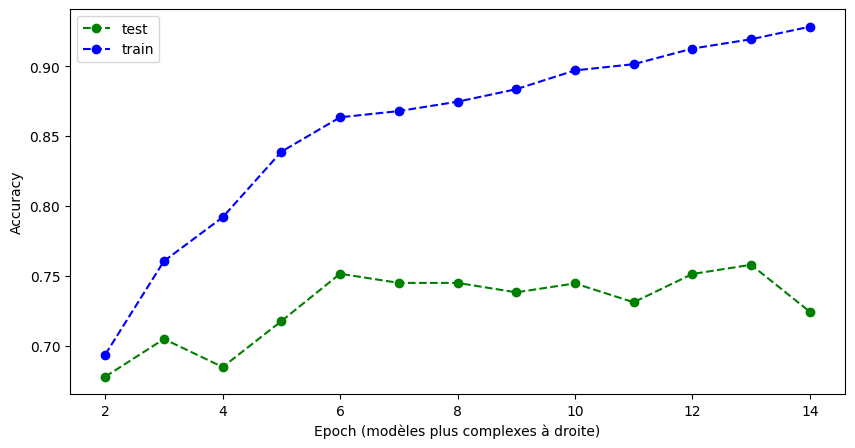

In [917]:
plt.figure(figsize=(10, 5))
plt.plot(results_df.T.index,
         results_df.T["test_accuracy"], "go--", label="test")
plt.plot(results_df.T.index,
         results_df.T["train_accuracy"],"bo--", label="train")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch (modèles plus complexes à droite)")

On peut remarquer un overfitting a partir de 6

A partir d'ici ne pas prendre en compte 

In [918]:
# importlib.reload(dm)

# df_nb_nan = dm.make_na_count(df)
# df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
# median = dm.compute_max_nan(df_nb_nan,0.5)
# plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label="Median")
# plt.legend(loc='upper right')

On s'intéresse à la partie gauche du graphique (avec le moins de NaN possible). On voit qu'en à 50% des données (la médiane) on obtient une quantité de NaN de 5, ce qui est acceptable pour la quantité de données. On supprime ensuite les pays correspondans à la partie gauche du graphique.

In [919]:
# importlib.reload(dm)

# df_step1_clean = dm.del_many_na_country(df, df_nb_nan, median)
# print(df_step1_clean)

Construct a label by discretisation of an attribute (this label can be built by clustering the values of this attribute). Use this label as class label

In [920]:
# import pandas as pd

# df = pd.DataFrame({'attribute': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# # Discretize the attribute into 3 bins
# df['label'] = pd.cut(df['attribute'], bins=3, labels=['low', 'medium', 'high'])

# # View the resulting dataframe
# print(df)
# df=df_step1_clean

In [921]:
# df=df_step1_clean
# df=df.iloc[1]
# import pandas as pd

# df = pd.DataFrame({'attribute': df})

# # Discretize the attribute into 3 bins
# df['label'] = pd.cut(df['attribute'], bins=3, labels=['low', 'medium', 'high'])

# # View the resulting dataframe
# print(df)
# df=df_step1_clean


In [922]:
# import pandas as pds
# import seaborn as sns
# import numpy as np
# from scipy import stats
# from sklearn.cluster import KMeans
# from sklearn import metrics
# import matplotlib.pyplot as plt

In [923]:
# #classes = df_step1_clean
# a=df_step1_clean.columns
# objects=df_step1_clean
# classes=[]
# for i in range(len(a)):
#     classes.append(a[i])
# df = pd.DataFrame(classes, columns = ['Name'])
# print(df)
# # objects = df.drop(['species'],axis=1)
# km=KMeans(n_clusters=3) # create a KMeans object



# objects.fillna(0, inplace=True) #rajouter des 0 a la place des NAN
# km.fit(objects) # compute the clusters
# centroids=km.cluster_centers_ # get the cluster centers
# print(centroids)


In [924]:
# import pandas as pd
# from sklearn.cluster import KMeans

# # Chargement des données
# data = pd.read_csv("mon_fichier.csv")

# # Sélection de l'attribut à discrétiser
# attribute = data['ma_colonne']

# # Initialisation de l'algorithme de clustering K-means
# kmeans = KMeans(n_clusters=3)

# # Entraînement de l'algorithme sur l'attribut sélectionné
# kmeans.fit(attribute.values.reshape(-1, 1))

# # Récupération des labels de chaque valeur de l'attribut
# labels = kmeans.labels_

# # Ajout des labels comme colonne de classe dans les données
# data['class_label'] = labels

# # Affiche les données avec la nouvelle colonne de classe
# print(data)


In [925]:
# ##########################autre en plus
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# print(discretizer)
# #avec un data numerique
# data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# a=discretizer.fit(data)# compute the clusters
# print(a)
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# print(discretizer)
# #avec un data numerique
# data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# a=discretizer.fit(data)# compute the clusters
# print(a)
# objects = discretizer.transform(data)
# print(objects)
# km=KMeans(n_clusters=3) # create a KMeans object

# labels = km.predict()
# #labels = kmeans.fit_predict(X_binned)
# from sklearn.cluster import KMeans
# # réc
# objects=df.iloc[0]
# print(objects)

# # Créez une instance de la classe KMeans avec le nombre de clusters souhaité, ici on prend 3.
# km = KMeans(n_clusters=3)


# km.fit(objects) # calcul le cluster
# centroids=km.cluster_centers_ # get the cluster centers
# print(centroids)


# # # Fit the model to the attribute data
# # kmeans.fit(df[['attribute']])

# # # Add the cluster labels as a new column
# # df['label'] = kmeans.labels_

# # # Assign the label column as the class label
# # df['class'] = df['label']




# #############################fichier classification.py en copier coller
# ##############################################
# import pandas as pd

# #data = pd.read_csv("data.txt", sep="\t")
# #valeurmanquante=data.isna()
# #valeurmanquante.sum(axis=0)
# #print(valeurmanquante)
# ##############################################
# #import
# import pandas as pds
# import seaborn as sns
# import numpy as np
# from scipy import stats
# from sklearn.cluster import KMeans
# from sklearn import metrics
# import matplotlib.pyplot as plt
# # #label by discretisation of an attribute
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.cluster import KMeans
# # data = pd.read_csv("data.txt", sep="\t")
# # data = data.drop(data.index[-5:])
# # print(data.tail())
# # # on a un tableau de données nommé "data" et je discrétiser la colonne d'indice 0

# # # supposons que vous avez un tableau de données nommé "X"
# # # et que vous souhaitez discrétiser la colonne d'indice 0

# # #centroids=km.cluster_centers_ # get the cluster centers
# # #print(centroids)
# # discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
# # #'ordinal': les données sont encodées comme des entiers, où chaque bin est assigné à un entier unique.
# # #'onehot': les données sont encodées sous forme de vecteur de taille n_bins, avec une valeur de 1 dans le bin correspondant et 0 dans les autres.
# # #'binary': les données sont encodées comme des nombres binaires, avec une valeur de 1 dans le bin correspondant et -1 dans les autres.
# # print(discretizer)
# # #avec un data numerique
# # data= [[-2, 1, -4,   -1], [-1, 2, -3, -0.5],[ 0, 3, -2,  0.5],[ 1, 4, -1,    2]]
# # a=discretizer.fit(data)# compute the clusters
# # print(a)
# # objects = discretizer.transform(data)
# # print(objects)
# # #objects = discretizer.fit_transform(data[:,0].reshape(-1, 1))

# # km=KMeans(n_clusters=3) # create a KMeans object

# # labels = km.predict()
# # #labels = kmeans.fit_predict(X_binned)

# # from sklearn.linear_model import LogisticRegression

# # # entraînez un modèle de régression logistique en utilisant les étiquettes comme étiquettes de classe
# # clf = LogisticRegression()
# # clf.fit(data, labels)

# #################yanis#############
# ###################################

# import pandas as pd
# import matplotlib.pyplot as plt
# import importlib
# import data_managment as dm

# importlib.reload(dm)
# originial_df = pd.read_csv("data.txt", sep="\t")
# df = dm.build_adapted_df(originial_df);df

# importlib.reload(dm)

# df_nb_nan = dm.make_na_count(df)
# df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
# median = dm.compute_max_nan(df_nb_nan,0.5)
# plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label="Median")
# plt.legend(loc='upper right')

# importlib.reload(dm)

# df_step1_clean = dm.del_many_na_country(df, df_nb_nan, median)
# print(df_step1_clean)

# import pandas as pd
# from sklearn.cluster import KMeans

# # Chargement des données
# data = pd.read_csv("mon_fichier.csv")

# # Sélection de l'attribut à discrétiser
# attribute = data['ma_colonne']

# # Remplacement des valeurs manquantes par 0
# attribute.fillna(0, inplace=True)

# # Initialisation de l'algorithme de clustering K-means
# kmeans = KMeans(n_clusters=3)

# # Entraînement de l'algorithme sur l'attribut sélectionné
# kmeans.fit(attribute.values.reshape(-1, 1))

# # Récupération des labels de chaque valeur de l'attribut
# labels = kmeans.labels_

# # Ajout des labels comme colonne de classe dans les données
# data['class_label'] = labels

# # Affiche les données avec la nouvelle colonne de classe
# print(data)

